## Full PATEGAN rewrite

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from models import dp_wgan, pate_gan
import numpy as np
import pandas as pd
import collections, time

In [2]:
# HYPERPARAMETERS
MODEL_NAME = 'PATEGAN' # Don't change this
DATASET_NAME = 'churn' # Choose either 'churn' or 'marketing' exactly!
TARGET_VARIABLE = 'Exited' # either 'Exited' or 'Response'
TRAIN_TEST_RATIO = 0.25
LEAKY = False # Put False for normal relu. The number indicates the amount of negative slope. Default is 0.01

# These seem to be good to tune from what I can tell from the github.
NUM_TEACHERS = 8
TARGET_EPSILON = 10
TARGET_DELTA = 1e-4
LEARNING_RATE = 1e-4

# Following defaults in the toolbox. Might not be crucial to tune these
BATCH_SIZE = 64
TEACHER_ITER = 5
STUDENT_ITER = 5
NUM_MOMENTS= 100
LAP_SCALE = 1e-4

In [3]:
# Read in data and do train test split
df = pd.read_csv(f'{DATASET_NAME}_processed.csv')
df_train, df_test = train_test_split(df, test_size=TRAIN_TEST_RATIO, random_state=42, stratify = df[TARGET_VARIABLE])

# Initialise logfile path
timestamp = int(time.time())
logfile = f'log_{DATASET_NAME}_{MODEL_NAME}_{timestamp}_{TARGET_EPSILON}.csv'

In [4]:
# Grab x and y from the respective dataframes and convert to numpy arrays.
train_x = df_train.drop(columns=TARGET_VARIABLE).values
train_y = df_train[TARGET_VARIABLE].values
test_x = df_test.drop(columns=TARGET_VARIABLE).values
test_y = df_test[TARGET_VARIABLE].values

# Initialise scaler and use this to normalize the inputs.
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)


# Some misc variables for pategan 
data_columns = [col for col in df_train.columns if col != TARGET_VARIABLE]
class_ratios = df_train[TARGET_VARIABLE].sort_values().groupby(df_train[TARGET_VARIABLE]).size().values/train_x.shape[0]
input_dim = train_x.shape[1]
z_dim = int(input_dim / 4 + 1) if input_dim % 4 == 0 else int(input_dim / 4)
conditional = True

In [ ]:
# Initialise hyperparams and do TRAINING
Hyperparams = collections.namedtuple(
        'Hyperarams',
        'batch_size num_teacher_iters num_student_iters num_moments lap_scale class_ratios lr')
Hyperparams.__new__.__defaults__ = (None, None, None, None, None, None, None)

model = pate_gan.PATE_GAN(LEAKY,logfile, input_dim, z_dim, NUM_TEACHERS, TARGET_EPSILON, TARGET_DELTA, conditional)
model.train(train_x, train_y, test_x, test_y, data_columns, scaler, Hyperparams(batch_size=BATCH_SIZE, num_teacher_iters=TEACHER_ITER,
                                              num_student_iters=STUDENT_ITER, num_moments=NUM_MOMENTS,
                                              lap_scale=LAP_SCALE, class_ratios=class_ratios, lr=LEARNING_RATE))



Best Roc of 0 found, saving....
Step :  0 Loss SD :  0.7008012136281578 Loss G :  0.7809650556559247 Epsilon :  0.09274980371976183 ROC_SCORE:  0.6363626496049511
Step :  10 Loss SD :  0.6942692695665338 Loss G :  0.7576940767680684 Epsilon :  0.09921380371976182 ROC_SCORE:  0.6348711638522665
Step :  20 Loss SD :  0.6975757592078511 Loss G :  0.7567712985485595 Epsilon :  0.10567780371976183 ROC_SCORE:  0.6324708733505094
Best Roc of 0.6363626496049511 found, saving....
Step :  30 Loss SD :  0.6866581249919952 Loss G :  0.7591672490062915 Epsilon :  0.11214180371976187 ROC_SCORE:  0.6371757387615586
Best Roc of 0.6371757387615586 found, saving....
Step :  40 Loss SD :  0.7160411002772764 Loss G :  0.770765299156676 Epsilon :  0.11860580371976191 ROC_SCORE:  0.6400185905336292
Step :  50 Loss SD :  0.7052686038294211 Loss G :  0.7504189439479136 Epsilon :  0.12506980371976192 ROC_SCORE:  0.6355288385159544
Step :  60 Loss SD :  0.692065210979011 Loss G :  0.7364775056998085 Epsilon :  

Step :  600 Loss SD :  0.6919909928260499 Loss G :  0.6856637889549123 Epsilon :  0.38028613004031625 ROC_SCORE:  0.6377529925924026
Step :  610 Loss SD :  0.691941400692252 Loss G :  0.6866570701573937 Epsilon :  0.3834861300403158 ROC_SCORE:  0.6345549076936589
Step :  620 Loss SD :  0.6916346721749135 Loss G :  0.6860165335644124 Epsilon :  0.38662769108283196 ROC_SCORE:  0.6327747950255521
Step :  630 Loss SD :  0.6939897343680764 Loss G :  0.6856709948626836 Epsilon :  0.3897636910828319 ROC_SCORE:  0.6430489264558884
Step :  640 Loss SD :  0.6960126662661179 Loss G :  0.6853662000682204 Epsilon :  0.3928798887654502 ROC_SCORE:  0.6358771643318312
Step :  650 Loss SD :  0.6920122504296028 Loss G :  0.6860489244896205 Epsilon :  0.39595188876545084 ROC_SCORE:  0.6360325788247506
Step :  660 Loss SD :  0.6937926435501568 Loss G :  0.6857886216279561 Epsilon :  0.3990238887654515 ROC_SCORE:  0.6321699119515225
Step :  670 Loss SD :  0.6931624397901379 Loss G :  0.6874407011914018 Eps

Step :  1220 Loss SD :  0.6936674411152786 Loss G :  0.6910925314308535 Epsilon :  0.5443963638816531 ROC_SCORE:  0.6355456134136028
Step :  1230 Loss SD :  0.6919798485106798 Loss G :  0.6922861065015107 Epsilon :  0.5466363638816522 ROC_SCORE:  0.6403461944171167
Step :  1240 Loss SD :  0.6930061822480059 Loss G :  0.6912151423768931 Epsilon :  0.5488763638816513 ROC_SCORE:  0.6359812673731201
Step :  1250 Loss SD :  0.6935439210520908 Loss G :  0.690620763874079 Epsilon :  0.5511163638816503 ROC_SCORE:  0.6282406388670432
Step :  1260 Loss SD :  0.6938112391261565 Loss G :  0.6902322519113901 Epsilon :  0.5533563638816495 ROC_SCORE:  0.6309433709058149
Step :  1270 Loss SD :  0.693143515782545 Loss G :  0.6899772279675375 Epsilon :  0.5555963638816486 ROC_SCORE:  0.6334546717596571
Step :  1280 Loss SD :  0.6928536611176918 Loss G :  0.6913951369277943 Epsilon :  0.5578363638816477 ROC_SCORE:  0.6379903080561939
Step :  1290 Loss SD :  0.692696304123508 Loss G :  0.6912989636425064 

Step :  1840 Loss SD :  0.6932099539960238 Loss G :  0.6932786193338609 Epsilon :  0.6706303275705917 ROC_SCORE:  0.6269780811293255
Step :  1850 Loss SD :  0.6935359952545368 Loss G :  0.6926771048852605 Epsilon :  0.6724863275705918 ROC_SCORE:  0.6299694400835193
Step :  1860 Loss SD :  0.6932919475304926 Loss G :  0.6927356666074668 Epsilon :  0.6743423275705919 ROC_SCORE:  0.6305230117059183
Step :  1870 Loss SD :  0.6932891793408535 Loss G :  0.6928281071071407 Epsilon :  0.676198327570592 ROC_SCORE:  0.6251091601795506
Step :  1880 Loss SD :  0.6930374281525629 Loss G :  0.6932131969520305 Epsilon :  0.678054327570592 ROC_SCORE:  0.6335878841821596
Step :  1890 Loss SD :  0.6933260395127183 Loss G :  0.6923352208990898 Epsilon :  0.6799103275705921 ROC_SCORE:  0.6317342579920052
Step :  1900 Loss SD :  0.6930749178001437 Loss G :  0.6921698763457014 Epsilon :  0.6817663275705922 ROC_SCORE:  0.6284473648115932
Step :  1910 Loss SD :  0.6934739518462869 Loss G :  0.6920345633155587

Step :  2460 Loss SD :  0.6931655043884364 Loss G :  0.6911153986029208 Epsilon :  0.7775241821657007 ROC_SCORE:  0.6285361730932615
Step :  2470 Loss SD :  0.6934415283644164 Loss G :  0.6912900422760895 Epsilon :  0.7791241821657023 ROC_SCORE:  0.6249759477570481
Step :  2480 Loss SD :  0.6931232740679483 Loss G :  0.691259401800715 Epsilon :  0.7807241821657039 ROC_SCORE:  0.6240977325272172
Step :  2490 Loss SD :  0.6932041592137168 Loss G :  0.6909326584261255 Epsilon :  0.7823241821657055 ROC_SCORE:  0.6313277134137015
Step :  2500 Loss SD :  0.6932986687229493 Loss G :  0.6907635402850797 Epsilon :  0.7839241821657071 ROC_SCORE:  0.6242003554304785
Step :  2510 Loss SD :  0.6928479311695384 Loss G :  0.6906822732834943 Epsilon :  0.7855241821657087 ROC_SCORE:  0.6305674158467525
Step :  2520 Loss SD :  0.6932965496592894 Loss G :  0.6908930626437275 Epsilon :  0.7871241821657103 ROC_SCORE:  0.6286832001373568
Step :  2530 Loss SD :  0.6929242837148921 Loss G :  0.691267458742274

Step :  3080 Loss SD :  0.6932627694148632 Loss G :  0.6896460804439136 Epsilon :  0.8721750350899068 ROC_SCORE:  0.6271029061030038
Step :  3090 Loss SD :  0.693763810165163 Loss G :  0.6895654447783292 Epsilon :  0.8736470350899072 ROC_SCORE:  0.6271848070738757
Step :  3100 Loss SD :  0.6931069339456573 Loss G :  0.6894531340915678 Epsilon :  0.8751190350899075 ROC_SCORE:  0.6123099132737791
Step :  3110 Loss SD :  0.6927565488296603 Loss G :  0.6888865396691609 Epsilon :  0.8765910350899078 ROC_SCORE:  0.6294365903935095
Step :  3120 Loss SD :  0.6926226002398312 Loss G :  0.6888921382951054 Epsilon :  0.8780244367606121 ROC_SCORE:  0.6282850430078772
Step :  3130 Loss SD :  0.6935144217559803 Loss G :  0.6893153768910577 Epsilon :  0.8794324367606111 ROC_SCORE:  0.6243044584717674
Step :  3140 Loss SD :  0.6932808072139883 Loss G :  0.6891336707322996 Epsilon :  0.8808404367606102 ROC_SCORE:  0.6211798870950712
Step :  3150 Loss SD :  0.6936390369809774 Loss G :  0.68929246334853 

Step :  3700 Loss SD :  0.6931359032688365 Loss G :  0.693092364755208 Epsilon :  0.9579314185988256 ROC_SCORE:  0.6236245817376622
Step :  3710 Loss SD :  0.6931472562064864 Loss G :  0.6935645413928212 Epsilon :  0.9592754185988245 ROC_SCORE:  0.6239201159638806
Step :  3720 Loss SD :  0.6929008175463716 Loss G :  0.6940494077056717 Epsilon :  0.9606194185988229 ROC_SCORE:  0.6327096689523287
Step :  3730 Loss SD :  0.6929374755965719 Loss G :  0.6945108233772513 Epsilon :  0.9619634185988218 ROC_SCORE:  0.622982201833595
Step :  3740 Loss SD :  0.6928976880640286 Loss G :  0.6944749111149772 Epsilon :  0.9633074185988203 ROC_SCORE:  0.6213353015879908
Step :  3750 Loss SD :  0.6931732486861002 Loss G :  0.6939837796343624 Epsilon :  0.9646514185988192 ROC_SCORE:  0.6277314713854782
Step :  3760 Loss SD :  0.6930598861565199 Loss G :  0.6945760928125668 Epsilon :  0.9659954185988177 ROC_SCORE:  0.620455606220132
Step :  3770 Loss SD :  0.6932880106495279 Loss G :  0.6942373499959501 

Step :  4320 Loss SD :  0.6931884574511562 Loss G :  0.6938106358804601 Epsilon :  1.0371191762208225 ROC_SCORE:  0.6237869035413781
Step :  4330 Loss SD :  0.6932129015613313 Loss G :  0.6938404461247969 Epsilon :  1.038335176220824 ROC_SCORE:  0.6205153051205867
Step :  4340 Loss SD :  0.6930846762757801 Loss G :  0.693815206104511 Epsilon :  1.0395511762208254 ROC_SCORE:  0.6203307812464538
Step :  4350 Loss SD :  0.6931224599677671 Loss G :  0.6935555840464618 Epsilon :  1.0407671762208268 ROC_SCORE:  0.6263801053660923
Step :  4360 Loss SD :  0.6931715046247491 Loss G :  0.6939344348374011 Epsilon :  1.0419831762208283 ROC_SCORE:  0.6251313622499677
Step :  4370 Loss SD :  0.6931246815254077 Loss G :  0.693875279765428 Epsilon :  1.0431991762208297 ROC_SCORE:  0.6221025064657363
Step :  4380 Loss SD :  0.6934076201908413 Loss G :  0.6945308055959922 Epsilon :  1.0444151762208311 ROC_SCORE:  0.6214088151100383
Step :  4390 Loss SD :  0.6932899265829714 Loss G :  0.6942772035851571 

Step :  4940 Loss SD :  0.6931201704817329 Loss G :  0.6928597502641927 Epsilon :  1.1109879277631678 ROC_SCORE:  0.6169703745439942
Step :  4950 Loss SD :  0.6931459770329126 Loss G :  0.6930927064494984 Epsilon :  1.1121399277631676 ROC_SCORE:  0.6209065549392699
Step :  4960 Loss SD :  0.6932109515409247 Loss G :  0.6927282093876526 Epsilon :  1.1132919277631672 ROC_SCORE:  0.6178041856329909
Step :  4970 Loss SD :  0.6931279592922186 Loss G :  0.6928498697160871 Epsilon :  1.114443927763167 ROC_SCORE:  0.6260026701690021
Step :  4980 Loss SD :  0.6931527348664386 Loss G :  0.6929648227017726 Epsilon :  1.1155959277631666 ROC_SCORE:  0.6304342034242499
Step :  4990 Loss SD :  0.6930283684087539 Loss G :  0.693691674980105 Epsilon :  1.1167479277631662 ROC_SCORE:  0.6211201881946163
Step :  5000 Loss SD :  0.6933097886808794 Loss G :  0.6941064164449171 Epsilon :  1.117899927763166 ROC_SCORE:  0.6215198254621237
Step :  5010 Loss SD :  0.6930307749667031 Loss G :  0.6940867310127691 

Step :  5560 Loss SD :  0.6932457587112215 Loss G :  0.6946886829723586 Epsilon :  1.1806830732482596 ROC_SCORE:  0.6252936840536836
Step :  5570 Loss SD :  0.6927390037857271 Loss G :  0.6950307394995061 Epsilon :  1.1817710732482587 ROC_SCORE:  0.626395400125713
Step :  5580 Loss SD :  0.6932471038453378 Loss G :  0.6947229724518296 Epsilon :  1.1828590732482578 ROC_SCORE:  0.6207067363055162
Step :  5590 Loss SD :  0.6932864125018221 Loss G :  0.6946037610059227 Epsilon :  1.1839470732482569 ROC_SCORE:  0.6314540185254074
Step :  5600 Loss SD :  0.6931012388153599 Loss G :  0.6946504000420454 Epsilon :  1.185035073248256 ROC_SCORE:  0.6219845888028543
Step :  5610 Loss SD :  0.6930962714442837 Loss G :  0.694829104160372 Epsilon :  1.186123073248255 ROC_SCORE:  0.623188927778145
Step :  5620 Loss SD :  0.6929833270120311 Loss G :  0.6949145399292559 Epsilon :  1.1872110732482541 ROC_SCORE:  0.6210397673617724
Step :  5630 Loss SD :  0.6931493442640065 Loss G :  0.6952293525264658 Ep

Step :  6180 Loss SD :  0.6936176092298649 Loss G :  0.6952744779949652 Epsilon :  1.2469570914649855 ROC_SCORE:  0.6163057925695098
Step :  6190 Loss SD :  0.6929559472807478 Loss G :  0.6946711357091588 Epsilon :  1.2479810914649856 ROC_SCORE:  0.6236620785677001
Step :  6200 Loss SD :  0.6931010083461828 Loss G :  0.6946887998243613 Epsilon :  1.249005091464985 ROC_SCORE:  0.6257002286319874
Step :  6210 Loss SD :  0.6934258226569981 Loss G :  0.6949153137254523 Epsilon :  1.2500290914649852 ROC_SCORE:  0.6231223215668937
Step :  6220 Loss SD :  0.6932116891334558 Loss G :  0.6951531762624674 Epsilon :  1.251053091464985 ROC_SCORE:  0.620455606220132
Step :  6230 Loss SD :  0.6933549361237694 Loss G :  0.6948003143960075 Epsilon :  1.252077091464985 ROC_SCORE:  0.6094364719824673
Step :  6240 Loss SD :  0.6931480512334656 Loss G :  0.6944639721107976 Epsilon :  1.2531010914649845 ROC_SCORE:  0.6236536911188759
Step :  6250 Loss SD :  0.6928278198952692 Loss G :  0.694647819391023 Ep

Step :  6800 Loss SD :  0.693637989684524 Loss G :  0.6953782342638647 Epsilon :  1.3104450914649755 ROC_SCORE:  0.6170216859956248
Step :  6810 Loss SD :  0.6929173445660408 Loss G :  0.6949926261746608 Epsilon :  1.3114690914649756 ROC_SCORE:  0.6190016172974849
Step :  6820 Loss SD :  0.6931938115973342 Loss G :  0.6946228326547484 Epsilon :  1.3124930914649753 ROC_SCORE:  0.6199686408089843
Step :  6830 Loss SD :  0.6930919396262636 Loss G :  0.694975134307239 Epsilon :  1.3135170914649754 ROC_SCORE:  0.6261067732102912
Step :  6840 Loss SD :  0.6926938025623051 Loss G :  0.6952333255704578 Epsilon :  1.3145410914649749 ROC_SCORE:  0.6192596546936657
Step :  6850 Loss SD :  0.6928871577752581 Loss G :  0.6948145398104102 Epsilon :  1.315565091464975 ROC_SCORE:  0.6255157047578543
Step :  6860 Loss SD :  0.6927123868187623 Loss G :  0.69516923928687 Epsilon :  1.3165374551411577 ROC_SCORE:  0.6261358825915045
Step :  6870 Loss SD :  0.6933498165150814 Loss G :  0.6952905395799168 Ep

Step :  7420 Loss SD :  0.6931204851182111 Loss G :  0.6940284326822523 Epsilon :  1.3702974551412825 ROC_SCORE:  0.6147546079163703
Step :  7430 Loss SD :  0.6931806934804721 Loss G :  0.6936865879193066 Epsilon :  1.3712574551412848 ROC_SCORE:  0.6202419729647856
Step :  7440 Loss SD :  0.6931665548307634 Loss G :  0.6937423176741868 Epsilon :  1.3722174551412871 ROC_SCORE:  0.6262093961135523
Step :  7450 Loss SD :  0.6932094211294716 Loss G :  0.6934323307650337 Epsilon :  1.3731774551412894 ROC_SCORE:  0.6189266236374097
Step :  7460 Loss SD :  0.6932396340124946 Loss G :  0.6934420193568307 Epsilon :  1.3741374551412915 ROC_SCORE:  0.6259222493361581
Step :  7470 Loss SD :  0.6931291487241503 Loss G :  0.693348716425793 Epsilon :  1.3750974551412938 ROC_SCORE:  0.6217265514066739
Step :  7480 Loss SD :  0.6931670491780828 Loss G :  0.6932889586134408 Epsilon :  1.376057455141296 ROC_SCORE:  0.6216530378846263
Step :  7490 Loss SD :  0.6931529514033372 Loss G :  0.693193722756656 

Step :  8040 Loss SD :  0.6933374880364768 Loss G :  0.6937424208945348 Epsilon :  1.4289613209210954 ROC_SCORE:  0.6245111844163175
Step :  8050 Loss SD :  0.6931763329235494 Loss G :  0.6940582893974429 Epsilon :  1.4298573209210954 ROC_SCORE:  0.6183508499445934
Step :  8060 Loss SD :  0.6929424105622006 Loss G :  0.6940957095716395 Epsilon :  1.430753320921095 ROC_SCORE:  0.6253311808837213
Step :  8070 Loss SD :  0.6930539759586206 Loss G :  0.6941653335950748 Epsilon :  1.431649320921095 ROC_SCORE:  0.6207511404463505
Step :  8080 Loss SD :  0.6930655057963419 Loss G :  0.6944635980381397 Epsilon :  1.4325453209210945 ROC_SCORE:  0.6230044039040121
Step :  8090 Loss SD :  0.6929631523684516 Loss G :  0.6946221862950462 Epsilon :  1.4334413209210946 ROC_SCORE:  0.6209800684613176
Step :  8100 Loss SD :  0.6932194079862102 Loss G :  0.694268962058245 Epsilon :  1.4343373209210941 ROC_SCORE:  0.614318953956853
Step :  8110 Loss SD :  0.6931082827045771 Loss G :  0.6937480170637633 E

Step :  8660 Loss SD :  0.6934998696995387 Loss G :  0.695381991127442 Epsilon :  1.484513320921083 ROC_SCORE:  0.6236467838080795
Step :  8670 Loss SD :  0.6935505694793122 Loss G :  0.6952769486412088 Epsilon :  1.4854093209210832 ROC_SCORE:  0.6339071006168229
Step :  8680 Loss SD :  0.6932690782147548 Loss G :  0.6950735570323543 Epsilon :  1.4863053209210828 ROC_SCORE:  0.619532986849467
Step :  8690 Loss SD :  0.693333450931632 Loss G :  0.6946317410857299 Epsilon :  1.4872013209210828 ROC_SCORE:  0.6201531646831172
Step :  8700 Loss SD :  0.6931179579642401 Loss G :  0.6940964727794706 Epsilon :  1.4880973209210824 ROC_SCORE:  0.6229377976927608
Step :  8710 Loss SD :  0.6933587725041885 Loss G :  0.6939794033505512 Epsilon :  1.4889933209210824 ROC_SCORE:  0.6262538002543864
Step :  8720 Loss SD :  0.6931614079069952 Loss G :  0.6936069756538151 Epsilon :  1.489889320921082 ROC_SCORE:  0.6261067732102912
Step :  8730 Loss SD :  0.6931471820902423 Loss G :  0.6931815015002515 Ep

Step :  9280 Loss SD :  0.6935523194285305 Loss G :  0.689958001563467 Epsilon :  1.5397075643307907 ROC_SCORE:  0.6209731611505211
Step :  9290 Loss SD :  0.693325087328958 Loss G :  0.6903643154294001 Epsilon :  1.540539564330789 ROC_SCORE:  0.6240602356971796
Step :  9300 Loss SD :  0.6933899152091824 Loss G :  0.6906181555099522 Epsilon :  1.5413715643307881 ROC_SCORE:  0.6175461482368102
Step :  9310 Loss SD :  0.6935098511660076 Loss G :  0.6902845104937805 Epsilon :  1.5422035643307865 ROC_SCORE:  0.6289496249823616
Step :  9320 Loss SD :  0.6938009925688997 Loss G :  0.6905651566900091 Epsilon :  1.5430355643307856 ROC_SCORE:  0.6249912425166688
Step :  9330 Loss SD :  0.6936084294337215 Loss G :  0.6915260334295975 Epsilon :  1.5438675643307842 ROC_SCORE:  0.623720297330127
Step :  9340 Loss SD :  0.6933510868048739 Loss G :  0.6915300131061185 Epsilon :  1.5446995643307833 ROC_SCORE:  0.6276648651742271
Step :  9350 Loss SD :  0.6934169016172607 Loss G :  0.6914332441834193 E

Step :  9900 Loss SD :  0.6934407662205431 Loss G :  0.6950006927373857 Epsilon :  1.5912915643307137 ROC_SCORE:  0.6161281760061732
Step :  9910 Loss SD :  0.6933083890985869 Loss G :  0.6948647250809823 Epsilon :  1.5921235643307121 ROC_SCORE:  0.6213644109692043
Step :  9920 Loss SD :  0.6935413837348603 Loss G :  0.6949289157388536 Epsilon :  1.5929555643307112 ROC_SCORE:  0.6223023250994899
Step :  9930 Loss SD :  0.6930464865662753 Loss G :  0.6947791044582523 Epsilon :  1.5937875643307098 ROC_SCORE:  0.6153096596767971
Step :  9940 Loss SD :  0.6929094393283215 Loss G :  0.6950556236798693 Epsilon :  1.5946195643307088 ROC_SCORE:  0.6130188993890977
Step :  9950 Loss SD :  0.6930360737614245 Loss G :  0.6949631034036086 Epsilon :  1.5954515643307072 ROC_SCORE:  0.6174060285035115
Step :  9960 Loss SD :  0.6928621386531475 Loss G :  0.6949963619956899 Epsilon :  1.5962835643307063 ROC_SCORE:  0.6244736875862797
Step :  9970 Loss SD :  0.6933954090295869 Loss G :  0.69472288245338

Step :  10520 Loss SD :  0.6932883888390853 Loss G :  0.6973936635754069 Epsilon :  1.6428755643306368 ROC_SCORE:  0.6233221402006475
Step :  10530 Loss SD :  0.6933029789018507 Loss G :  0.6977961785391 Epsilon :  1.6437075643306354 ROC_SCORE:  0.6227088696777937
Step :  10540 Loss SD :  0.6929946219672928 Loss G :  0.6984923575043229 Epsilon :  1.6445395643306344 ROC_SCORE:  0.6229155956223438
Step :  10550 Loss SD :  0.693160038946137 Loss G :  0.6982405681061005 Epsilon :  1.6453715643306328 ROC_SCORE:  0.6256642119399775
Step :  10560 Loss SD :  0.6928393848638821 Loss G :  0.6983178188483872 Epsilon :  1.6462035643306319 ROC_SCORE:  0.6226422634665425
Step :  10570 Loss SD :  0.6933170409840098 Loss G :  0.6981869880523198 Epsilon :  1.6470355643306303 ROC_SCORE:  0.6222066095070252
Step :  10580 Loss SD :  0.6927026890262458 Loss G :  0.6980243413991792 Epsilon :  1.6478675643306293 ROC_SCORE:  0.6323919326556932
Step :  10590 Loss SD :  0.6932936839643834 Loss G :  0.6975220165

Step :  11140 Loss SD :  0.6930322540593941 Loss G :  0.6950213064196671 Epsilon :  1.6929324701792487 ROC_SCORE:  0.6223911333811583
Step :  11150 Loss SD :  0.6934966171272967 Loss G :  0.6953664402835693 Epsilon :  1.6937004701792482 ROC_SCORE:  0.6195260795386706
Step :  11160 Loss SD :  0.6926932336949556 Loss G :  0.6952371759995659 Epsilon :  1.6944684701792476 ROC_SCORE:  0.6188753121857791
Step :  11170 Loss SD :  0.6935266657188879 Loss G :  0.6955510564736032 Epsilon :  1.695236470179247 ROC_SCORE:  0.6141635394639335
Step :  11180 Loss SD :  0.6935597640028175 Loss G :  0.6953120404089133 Epsilon :  1.6960044701792467 ROC_SCORE:  0.619326260904917
Step :  11190 Loss SD :  0.6932209293416083 Loss G :  0.6954271212775158 Epsilon :  1.6967724701792462 ROC_SCORE:  0.6185131717483094
Step :  11200 Loss SD :  0.6928827925227774 Loss G :  0.6952955118312482 Epsilon :  1.6975404701792456 ROC_SCORE:  0.6253380881945176
Step :  11210 Loss SD :  0.6930363287724608 Loss G :  0.69493966

Step :  11760 Loss SD :  0.6930653010982258 Loss G :  0.6944782164514186 Epsilon :  1.7405484701792162 ROC_SCORE:  0.616105973935756
Step :  11770 Loss SD :  0.6933835362849927 Loss G :  0.6943990903792949 Epsilon :  1.7413164701792156 ROC_SCORE:  0.6237716087817576
Step :  11780 Loss SD :  0.6934822607981586 Loss G :  0.6941085515032489 Epsilon :  1.742084470179215 ROC_SCORE:  0.6268157593256096
Step :  11790 Loss SD :  0.6930561320073532 Loss G :  0.6941323256248727 Epsilon :  1.7428524701792147 ROC_SCORE:  0.612287711203362
Step :  11800 Loss SD :  0.6929984569525689 Loss G :  0.6939542208905872 Epsilon :  1.7436204701792142 ROC_SCORE:  0.625013444587086
Step :  11810 Loss SD :  0.6927296547643924 Loss G :  0.694847541460011 Epsilon :  1.7443884701792136 ROC_SCORE:  0.6192665620044622
Step :  11820 Loss SD :  0.6931963099807833 Loss G :  0.6946848577802344 Epsilon :  1.745156470179213 ROC_SCORE:  0.6157369261874899
Step :  11830 Loss SD :  0.6931479655237467 Loss G :  0.694393945379

In [9]:
# Optional: Look at model architectures
print(model.student_disc)
print(model.teacher_disc[0])
print(model.generator)

Discriminator(
  (main): Sequential(
    (0): Linear(in_features=14, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=14, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
Generator(
  (main): Sequential(
    (0): Linear(in_features=4, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=13, bias=True)
  )
)


## Generate synthetic data using trained model, then save in CSV

In [27]:
# Helper functions for saving the synthetic data...
def update_array(indexes, cols = None):
    if cols: colsize = cols
    else: colsize = indexes.max() +1
    b = np.zeros((indexes.size, colsize))
    b[np.arange(indexes.size), indexes] = 1
    return b

def save_marketing():
    # Some fancy indexing to get the actual synthetic data..
    accepted = np.argmax(syn_save[:,16:21], axis=1)
    education = np.argmax(syn_save[:, 22:27], axis=1)
    marital = np.argmax(syn_save[:, 27:34], axis=1)
    country = np.argmax(syn_save[:, 34:], axis=1)

    syn_save[:,16:21] = update_array(accepted, cols=5)
    syn_save[:, 22:27] = update_array(education, cols=5)
    syn_save[:, 27:34] = update_array(marital, cols=7)
    syn_save[:, 34:] = update_array(country, cols=8)

    df1 = pd.DataFrame(syn_save, columns = df.columns.drop(TARGET_VARIABLE))
    df2 = pd.DataFrame(syn_y, columns = [TARGET_VARIABLE])
    df_save = pd.concat([df1,df2], axis =1)
    df_save.to_csv(f'synthetic_{MODEL_NAME}_{DATASET_NAME}_{TARGET_EPSILON}.csv')

def save_churn():
    geography = np.argmax(syn_save[:,8:11], axis=1)
    gender = np.argmax(syn_save[:,11:], axis=1)
    
    syn_save[:,8:11] = update_array(geography, cols=3)
    syn_save[:, 11:] = update_array(gender, cols=2)
    syn_save[:,4] = np.round(syn_save[:,4]) # num products
    syn_save[:,5] = np.round(np.clip(syn_save[:,5],0,1)) # Has card
    syn_save[:,6] = np.round(np.clip(syn_save[:,6],0,1)) # Is active


    df1 = pd.DataFrame(syn_save, columns = df.columns.drop(TARGET_VARIABLE))
    df2 = pd.DataFrame(syn_y, columns = [TARGET_VARIABLE])
    df_save = pd.concat([df1,df2], axis =1)
    df_save.to_csv(f'synthetic_{MODEL_NAME}_{DATASET_NAME}_{TARGET_EPSILON}.csv')


In [26]:
np.round(np.clip(syn_save[:,5],0,1)).min()

0.0

In [28]:
df_save = save_churn()

In [37]:
df_save

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,569.189810,40.029415,6.717890,89681.936477,2.0,1.0,1.0,130466.340459,0.0,0.0,1.0,0.0,1.0,0.0
1,570.501744,33.474992,8.674211,110469.707352,1.0,1.0,1.0,71928.116744,1.0,0.0,0.0,0.0,1.0,0.0
2,419.490332,51.890009,18.356562,200372.129774,0.0,0.0,1.0,264136.140441,0.0,0.0,1.0,0.0,1.0,1.0
3,542.538826,42.563155,8.338049,117159.416072,1.0,0.0,1.0,155246.459858,0.0,0.0,1.0,0.0,1.0,0.0
4,577.241597,42.062559,10.930599,89837.667759,1.0,0.0,1.0,137180.080401,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,594.765712,36.708907,6.737492,84549.090124,1.0,1.0,1.0,88441.888815,1.0,0.0,0.0,0.0,1.0,0.0
7496,533.535706,43.156655,10.432683,119125.835245,1.0,0.0,1.0,163115.984498,0.0,0.0,1.0,0.0,1.0,0.0
7497,563.589866,39.947245,6.797705,91301.876516,2.0,1.0,1.0,132893.947639,0.0,0.0,1.0,0.0,1.0,0.0
7498,586.354935,38.140655,8.512222,92579.078628,1.0,1.0,1.0,102529.715082,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
df_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [50]:
COL = 5
print(df_train.iloc[:,COL].value_counts())
print(df_save.iloc[:,COL].value_counts())

1    5304
0    2196
Name: HasCrCard, dtype: int64
0.0    5547
1.0    1953
Name: HasCrCard, dtype: int64


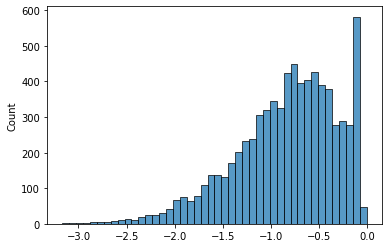

In [51]:
import seaborn as sns

sns.histplot(syn_x[:,COL])

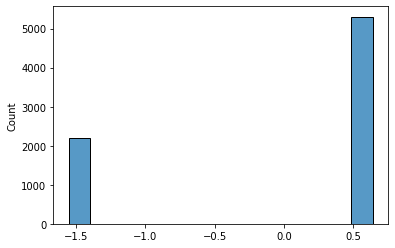

In [52]:
sns.histplot(train_x[:,COL])

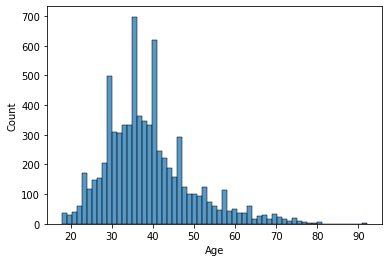

In [19]:
sns.histplot(df_train['Age'])

In [13]:
# Run this cell to generate data and save them.
syn_data = model.generate(train_x.shape[0], class_ratios)
syn_x, syn_y = syn_data[:, :-1], syn_data[:, -1]

# Make a copy for saving
syn_save = scaler.inverse_transform(syn_x)

# Save data to csv using functions
if DATASET_NAME == 'churn': save_churn()
else: save_marketing()

## Do classification using Neural Networks and look at ROC Score

In [41]:
# Train using Synthetic data, using simple neural network.
mlp = MLPClassifier((32,8), max_iter=1000, random_state=42)
mlp.fit(syn_x, syn_y)
pred_y = mlp.predict(test_x)

print('ROC Score', roc_auc_score(test_y, pred_y))
print('Accuracy', mlp.score(test_x,test_y))

ROC Score 0.523977249291754
Accuracy 0.4852


In [42]:
# Train using REAL data, using simple neural network.
mlp = MLPClassifier((32,8), max_iter=1000, random_state=42)
mlp.fit(train_x, train_y)
pred_y = mlp.predict(test_x)

print('ROC Score', roc_auc_score(test_y, pred_y))
print('Accuracy', mlp.score(test_x,test_y))
# Uitvoer van uitgevoerde code vanaf 7 jun. 2021 03:50
# 	Stream
# 		ROC Score 0.7530632082470008
# 		Accuracy 0.8754512635379061

ROC Score 0.7328967583990432
Accuracy 0.8564


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialise all models
classifier_names = ['MLP', 'RF', 'ADABOOST', 'DT', 'GauNB', 'BernNB', 'SVM', 'LogReg']
classifiers = [MLPClassifier((32,8), max_iter=1000, random_state=42), #MLP
               RandomForestClassifier(max_depth=2, random_state=42), #RF
               AdaBoostClassifier(n_estimators=50, random_state=42),
               DecisionTreeClassifier(random_state=42),
               GaussianNB(),
               BernoulliNB(),
               SVC(random_state=42),
               LogisticRegression(random_state=42)
]

In [ ]:
syn_clf_accuracy = []
syn_clf_roc_score = []
real_clf_accuracy = []
real_clf_roc_score = []

# Loop thru all classifiers.
for clf in classifiers:

    # Do synthetic
    clf.fit(syn_x, syn_y)
    pred_y = clf.predict(test_x)

    # compute score and append
    syn_clf_roc_score.append(roc_auc_score(test_y, pred_y))
    syn_clf_accuracy.append(clf.score(test_x,test_y))

    # Do real training data
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)

    # compute score and append
    real_clf_roc_score.append(roc_auc_score(test_y, pred_y))
    real_clf_accuracy.append(clf.score(test_x,test_y))

In [ ]:
score_df = pd.DataFrame({'Classifier Name':classifier_names,
                         'Accuracy on Synthetic':syn_clf_accuracy,
                         'ROC on Synthetic': syn_clf_roc_score,
                         'Accuracy on Real': real_clf_accuracy,
                         'ROC on Real': real_clf_roc_score,
                         })
score_df.to_csv('scores.csv') # Make into a csv that you can download and do computations!

In [ ]:
score_df

,Classifier Name,Accuracy on Synthetic,ROC on Synthetic,Accuracy on Real,ROC on Real
0,MLP,0.518051,0.612347,0.875451,0.753063
1,RF,0.850181,0.500000,0.851986,0.506024
2,ADABOOST,0.750903,0.545827,0.897112,0.750914
3,DT,0.514440,0.550674,0.803249,0.656013
4,GauNB,0.738267,0.622759,0.871841,0.636802
5,BernNB,0.790614,0.519556,0.781588,0.702824
6,SVM,0.850181,0.500000,0.879061,0.626161
7,LogReg,0.723827,0.658929,0.895307,0.715115
